In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### setup inline format style of tables

In [63]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [64]:
sns.set_palette("deep", desat=0.6)
sns.set_context(rc={"figure.figsize": (8,4)})

In [65]:
data = pd.read_csv('Data_Shared_WorkingFile.csv')
data.head()

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
0,201A,1,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
1,201A,2,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
2,201A,3,201AERAT,3504,NaN,600,15,3.0,8.0,1,0,0,0,0,NaN,NaN
3,201A,4,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
4,201A,5,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN


### Checking out the shape of the data file.

In [66]:
print ("Data Shape:", data.shape)

Data Shape: (71568, 16)


### We can see that there are roughly 4k critical data pts available.   Minimum abs error is best so it makes sense that the process has Error mean close to zero at -0.07.  1s = ~0.9

In [49]:
data.dtypes

Entity         object
Run_On_Ent      int64
Lot            object
Op              int64
Error         float64
Feature1        int64
Feature2        int64
Feature3      float64
Feature4      float64
Attribute1      int64
Attribute2      int64
Attribute3      int64
Attribute4      int64
Attribute5      int64
Fam_Type       object
DIC_Design     object
dtype: object

In [50]:
data.Error.describe()

count    3985.000000
mean       -0.073852
std         0.900633
min        -7.700000
25%        -0.544000
50%        -0.048000
75%         0.453000
max         6.467000
Name: Error, dtype: float64

### see what columns have data missing

In [56]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Count_Nulls']
nulls.index.name = 'Data_Column'
nulls

,Count_Nulls
Data_Column,
Error,67583
DIC_Design,65961
Fam_Type,65961
Attribute5,0
Attribute4,0
Attribute3,0
Attribute2,0
Attribute1,0
Feature4,0


### We can see the Error is fairly normal Gaussian distribution centered about zero.

Error skew: -0.342304438317


(array([   2.,    0.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,
           3.,    1.,    2.,    1.,    2.,    3.,    0.,    4.,   13.,
          19.,   21.,   47.,   77.,  147.,  225.,  327.,  490.,  602.,
         586.,  526.,  382.,  223.,  146.,   63.,   34.,   10.,    7.,
           2.,    4.,    2.,    2.,    1.,    1.,    3.,    2.,    0.,
           0.,    0.,    0.,    1.,    2.]),
 array([-7.7    , -7.41666, -7.13332, -6.84998, -6.56664, -6.2833 ,
        -5.99996, -5.71662, -5.43328, -5.14994, -4.8666 , -4.58326,
        -4.29992, -4.01658, -3.73324, -3.4499 , -3.16656, -2.88322,
        -2.59988, -2.31654, -2.0332 , -1.74986, -1.46652, -1.18318,
        -0.89984, -0.6165 , -0.33316, -0.04982,  0.23352,  0.51686,
         0.8002 ,  1.08354,  1.36688,  1.65022,  1.93356,  2.2169 ,
         2.50024,  2.78358,  3.06692,  3.35026,  3.6336 ,  3.91694,
         4.20028,  4.48362,  4.76696,  5.0503 ,  5.33364,  5.61698,
         5.90032,  6.18366,  6.467  ]),
 <a list of 50 P

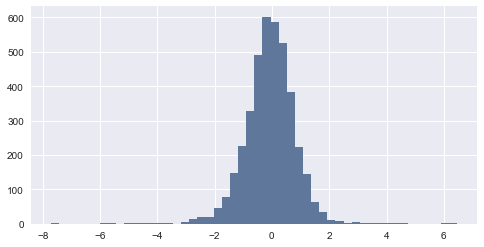

In [51]:
print('Error skew:',data.Error.skew())
plt.hist(data.Error.dropna(),bins=50)

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


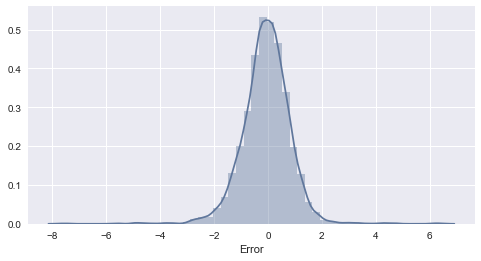

In [60]:
sns.distplot(data.Error.dropna(), bins = 50)

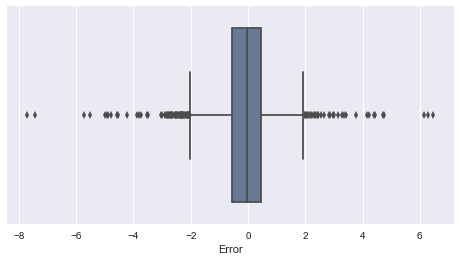

In [55]:
sns.boxplot(data.Error.dropna())

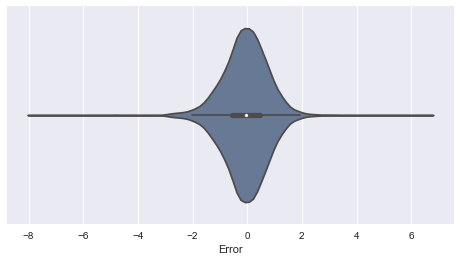

In [61]:
sns.violinplot(data.Error.dropna())

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


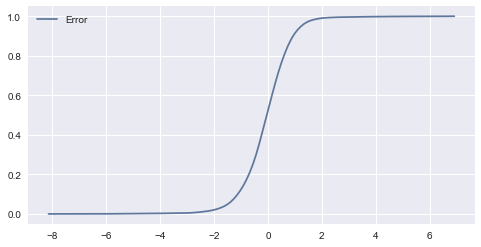

In [62]:
sns.kdeplot(data.Error.dropna(), cumulative = True)

### Create time series of a single Entity run (where we see Run_On_Ent restart at 1)

In [68]:
toy7_df = data.loc[data['Entity'] == '7A']
toy7_df

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
27805,7A,1,246186,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN
27806,7A,2,7A_CLEAN,3504,NaN,600,0,8.0,0.0,0,0,0,0,1,NaN,NaN
27807,7A,3,245352,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
27808,7A,4,246782,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
27809,7A,5,245739,3534,NaN,800,15,6.0,5.0,1,1,0,0,0,NaN,NaN
27810,7A,6,245927,3504,NaN,800,20,1.5,5.0,1,1,0,1,0,NaN,NaN
27811,7A,7,7AERAT,3504,NaN,600,15,3.0,8.0,1,0,0,0,0,NaN,NaN
27812,7A,8,7ACMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
27813,7A,9,246621,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN
27814,7A,10,246676,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN


C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


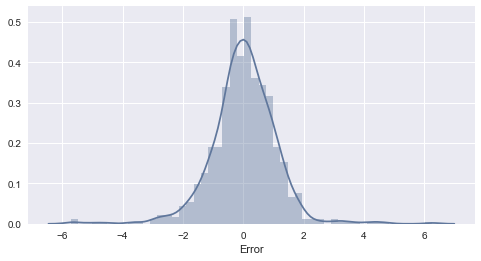

In [72]:
sns.distplot(toy7_df.Error.dropna(), bins = 50)

In [73]:
toy7_df.Error.describe()

count    764.000000
mean       0.017473
std        1.086037
min       -5.725000
25%       -0.524750
50%        0.046500
75%        0.648000
max        6.269000
Name: Error, dtype: float64